In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

**Below is the data generated from the random generator**

__Enter ANY integer number from your head: 9149
You entered as seed for the random number generator: 9149
The initial velocity of the cannonball is: 90 m/s
The velocity of the space invader is: 14 m/s__

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# constants
g = 9.81  # gravitational acceleration (m/s^2)
rho = 1.225  # air density (kg/m^3)
C = 0.25  # drag coefficient
D = 0.043  # diameter of cannonball (m)
A = np.pi*(D/2)**2  # cross-sectional area of cannonball (m^2)
m = 0.046  # mass of cannonball (kg)
vs = 14  # speed of space invader (m/s)

# initial conditions
v0 = 90  # initial velocity of cannonball (m/s)
theta = np.deg2rad(50)  # angle of cannon (rad)
x0 = 0  # initial x position of cannonball (m)
y0 = 0  # initial y position of cannonball (m)
vx0 = v0*np.cos(theta)  # initial x velocity of cannonball (m/s)
vy0 = v0*np.sin(theta)  # initial y velocity of cannonball (m/s)


In [7]:
def drag_force(v):
    # calculates the drag force on the cannonball
    return -0.5*rho*C*A*np.abs(v)*v


In [8]:
def projectile_motion(t, y):
    # calculates the derivatives of the state variables for the projectile motion
    x, y, vx, vy = y
    v = np.sqrt(vx**2 + vy**2)
    dxdt = vx
    dydt = vy
    dvxdt = drag_force(vx)/m
    dvydt = -g + drag_force(vy)/m
    return np.array([dxdt, dydt, dvxdt, dvydt])


In [9]:
# time step and duration of simulation
dt = 0.01
t_max = 10

# initial state vector
y0 = np.array([x0, y0, vx0, vy0])

# initialize arrays for storing state variables
t = np.arange(0, t_max, dt)
y = np.zeros((len(t), len(y0)))
y[0] = y0

# solve equations of motion using Euler method
for i in range(len(t)-1):
    y[i+1] = y[i] + dt*projectile_motion(t[i], y[i])


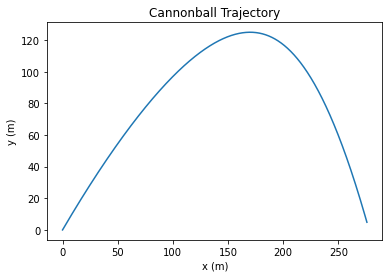

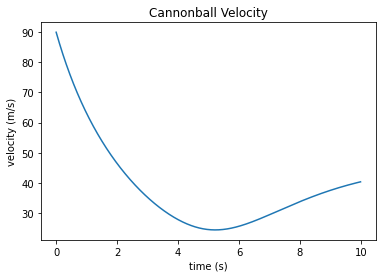

In [10]:
# plot trajectory
plt.plot(y[:, 0], y[:, 1])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Cannonball Trajectory')
plt.show()

# plot velocity
v = np.sqrt(y[:, 2]**2 + y[:, 3]**2)
plt.plot(t, v)
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Cannonball Velocity')
plt.show()


**In the above graphs we can observe the trajectory an velocity of the cannonball, the 
trajectory of the space invader and the cannonball coincide we know that they will come into contact**

In [24]:
'''We can superimpose to graphs to see if they come into contact
For that we will need to calcualte the displacements of the space invader at
intervals dt'''


# time step and duration of invader
dt = 0.01
t_max = 10

# initialize arrays for storing time and displacements
t = np.arange(0, t_max, dt)
displacements = np.zeros(len(t))

# calculate displacements at each time step
for i in range(len(t)):
    displacements[i] = vs*t[i]



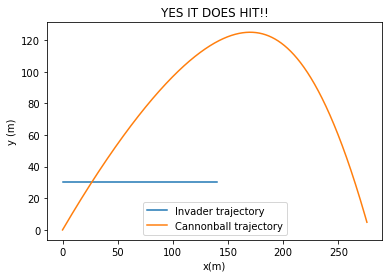

In [33]:
# plot trajectory for space invader
hspaceinvader = [30]*len(displacements)
plt.plot(displacements,hspaceinvader, label = 'Invader trajectory')
plt.plot(y[:, 0], y[:, 1], label = 'Cannonball trajectory') #its moving at a constant speed and its vertical displacement is stable at 30
plt.xlabel('x(m)')
plt.ylabel('y (m)')
plt.title('YES IT DOES HIT!!')
plt.legend()
plt.show()

**The trajectories of the cannonball and the invader coincide so they do hit**